# Import Libraries

In [1]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
data = pd.read_csv('cityoflondon.csv')
data.head()

,Year,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,BusesCoaches,LightGoodsVehicles,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles
0,2000,6751,Estimated,Estimated using previous year's AADF on this link,London,City of London,A201,PU,531650,181040,...,42.25,521.12,81.72,4.90,7.62,3.27,2.18,2.18,101.86,3746.83
1,2000,8618,Estimated,Estimated using previous year's AADF on this link,London,City of London,A3211,PU,533000,180669,...,175.14,758.38,213.92,25.72,43.95,17.01,20.00,14.56,335.17,8456.03
2,2000,8619,Estimated,Estimated using previous year's AADF on this link,London,City of London,A300,PU,532400,180700,...,13.93,92.04,19.91,3.58,9.03,7.26,2.95,2.31,45.04,757.11
3,2000,16177,Estimated,Estimated using previous year's AADF on this link,London,City of London,A10,PU,533300,181600,...,171.19,440.36,105.87,3.40,5.85,1.50,0.95,1.91,119.48,3437.25
4,2000,16400,Estimated,Estimated from nearby links,London,City of London,A40,PU,532050,181300,...,6.60,74.91,12.29,1.09,0.20,0.27,0.16,0.14,14.15,614.06


In [5]:
Y = data[['CarsTaxis']]
X = data[['PedalCycles']]
StartJunction = data[['StartJunction']]
EndJunction = data[['EndJunction']]

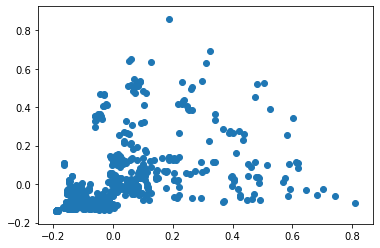

In [6]:
X_norm = (X - X.mean()) / (X.max() - X.min())
Y_norm = (Y - Y.mean()) / (Y.max() - Y.min())
pl.scatter(Y_norm,X_norm)
pl.show()

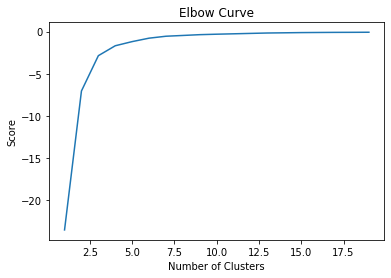

In [7]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y_norm).score(Y_norm) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

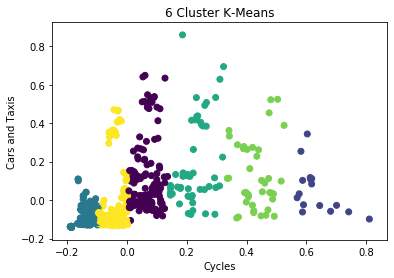

In [8]:
pca = PCA(n_components=1).fit(Y_norm)
pca_d = pca.transform(Y_norm)
pca_c = pca.transform(X_norm)

kmeans=KMeans(n_clusters=6)
kmeansoutput=kmeans.fit(Y_norm)
kmeansoutput
pl.figure('6 Cluster K-Means')
pl.scatter(pca_d[:, 0], pca_c[:, 0], c=kmeansoutput.labels_)

labels=kmeansoutput.labels_
labels=pd.DataFrame(labels)

frames = [StartJunction, EndJunction, labels]
result = pd.concat(frames)

pl.xlabel('Cycles')
pl.ylabel('Cars and Taxis')
pl.title('6 Cluster K-Means')
pl.show()